# Denoising documents with autoenconders

The dataset that will be using is provied for free by the University of California Irvine (UCI).

The dataset cosists of 216 different noisy images. The noisy images are scanned office documents that are tainted by coffee stains, wrinkled marks, and others sorts of defects that are typical in office documents. For every noisy image, a corresponding reference clean image is provided, which represents the office document in an ideal noiseless state.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path

In [ ]:
CURRENT_DIR = Path('.').resolve()
DATA_DIR = CURRENT_DIR.joinpath('drive','MyDrive','Noisy_Documents')

Let's take a look at the dataset to have a better idea of what we are working with

In [ ]:
noisy_imgs_path = DATA_DIR.joinpath('noisy')
clean_imgs_path = DATA_DIR.joinpath('clean')

To load the .png images to python, we can use the `load_img` function provided by Keras. To convert the loaded images into `numpy` array, we use the `img_to_array` function in Keras.

In [ ]:
list_noisy = [archivo for archivo in noisy_imgs_path.rglob('*') if archivo.is_file()]
list_clean = [archivo for archivo in clean_imgs_path.rglob('*') if archivo.is_file()]

In [ ]:
from natsort import natsorted
list_noisy = natsorted(list_noisy, key=str)
list_clean = natsorted(list_clean, key=str)

In [ ]:
import numpy as np
from keras.utils import load_img, img_to_array

In [ ]:
X_train_noisy = []
for file in list_noisy:
    img = load_img(str(file), color_mode='grayscale',
                   target_size = (424,544))
    img = img_to_array(img).astype('float32')/255
    X_train_noisy.append(img)

X_train_noisy = np.array(X_train_noisy)

In [ ]:
X_train_clean = []
for file in list_clean:
    img = load_img(str(file), color_mode='grayscale',
                   target_size = (424,544))
    img = img_to_array(img).astype('float32')/255
    X_train_clean.append(img)

X_train_clean = np.array(X_train_clean)

Let's display the loaded images to have a better idea of the kind of images we are working with. We select 3 random images and plots them.


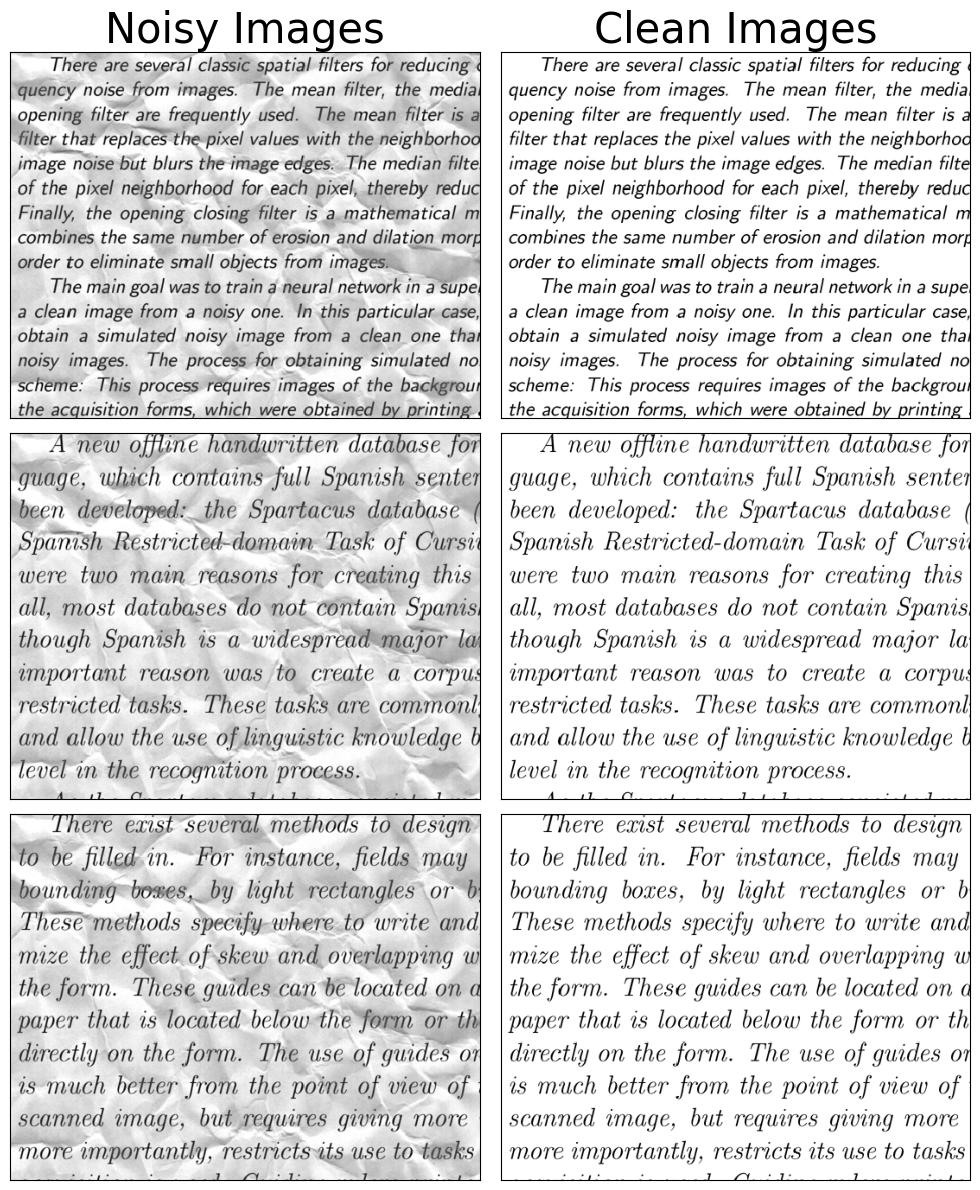

In [ ]:
import random
import matplotlib.pyplot as plt

fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(3, 2, figsize=(10,12))
randomly_selected_imgs = random.sample(range(X_train_noisy.shape[0]),3)
# plot noisy images on the left
for i, ax in enumerate([ax1,ax3,ax5]):
    ax.imshow(X_train_noisy[i].reshape(424,544), cmap='gray')
    if i == 0:
        ax.set_title("Noisy Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# plot clean images on the right
for i, ax in enumerate([ax2,ax4,ax6]):
    ax.imshow(X_train_clean[i].reshape(424,544), cmap='gray')
    if i == 0:
        ax.set_title("Clean Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

Before we proceed to train our model, let's split our dataset into a training and testing set

In [ ]:
# use the first 20 noisy images as testing images
X_test_noisy = X_train_noisy[0:20,]
X_train_noisy = X_train_noisy[21:,]

# use the first 20 clean images as testing images

X_test_clean = X_train_clean[0:20,]
X_train_clean = X_train_clean[21:,]

-----

#Basic convolutional autoencoder

Let's start with a basic model to see how far we can go with it

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(
    filters = 8,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same',
    input_shape=(424,544,1)
))

In [ ]:
model.add(Conv2D(
    filters=8,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same'
))

In [ ]:
model.add(Conv2D(
    filters=1,
    kernel_size = (3,3),
    activation = 'sigmoid',
    padding = 'same'
))

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy'
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 420, 540, 8)       80        
                                                                 
 conv2d_1 (Conv2D)           (None, 420, 540, 8)       584       
                                                                 
 conv2d_2 (Conv2D)           (None, 420, 540, 1)       73        
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(
    X_train_noisy,
    X_train_clean,
    epochs=10,
    shuffle=True,
    validation_data = (X_test_noisy, X_test_clean)
)

Epoch 1/10
7/7 [==============================] - 14s 236ms/step - loss: 0.6697 - val_loss: 0.6428
Epoch 2/10
7/7 [==============================] - 1s 96ms/step - loss: 0.6249 - val_loss: 0.5896
Epoch 3/10
7/7 [==============================] - 1s 95ms/step - loss: 0.5636 - val_loss: 0.5099
Epoch 4/10
7/7 [==============================] - 1s 99ms/step - loss: 0.4739 - val_loss: 0.4124
Epoch 5/10
7/7 [==============================] - 1s 96ms/step - loss: 0.3765 - val_loss: 0.3219
Epoch 6/10
7/7 [==============================] - 1s 97ms/step - loss: 0.2979 - val_loss: 0.2715
Epoch 7/10
7/7 [==============================] - 1s 103ms/step - loss: 0.2640 - val_loss: 0.2595
Epoch 8/10
7/7 [==============================] - 1s 106ms/step - loss: 0.2550 - val_loss: 0.2508
Epoch 9/10
7/7 [==============================] - 1s 109ms/step - loss: 0.2438 - val_loss: 0.2394
Epoch 10/10
7/7 [==============================] - 1s 101ms/step - loss: 0.2321 - val_loss: 0.2279


In [ ]:
output = model.predict(X_test_noisy)

1/1 [==============================] - 0s 130ms/step


Let's plot the output and see what kind of results we got. The following code plots the original noisy images in the left column, the original clena images in the middle column, and the denoised image output from our model in the right column.

In [ ]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]),2)
for i, ax in enumerate([ax1, ax4]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_noisy[idx].reshape(424,544), cmap='gray')
    if i == 0:
        ax.set_title("Noisy Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax2, ax5]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_clean[idx].reshape(424,544), cmap='gray')
    if i == 0:
        ax.set_title("Clean Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax3, ax6]):
    idx = randomly_selected_imgs[i]
    ax.imshow(output[idx].reshape(424,544), cmap='gray')
    if i == 0:
        ax.set_title("Output Denoised Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

-----

# Deep Convolutional autoencoder

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [ ]:
input = layers.Input(shape=(424, 544, 1))

## Decoder

178


In [ ]:
x = layers.Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same')(input)

In [ ]:
x = layers.Conv2D(
    filters = 16,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same')(x)

In [ ]:
x = layers.Conv2D(
    filters = 8,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same')(x)

## Encoder

In [ ]:
x = layers.Conv2D(
    filters = 8,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same')(x)

x = layers.Conv2D(
    filters = 16,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same')(x)

x = layers.Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same')(x)

x = layers.Conv2D(
    filters = 1,
    kernel_size = (3,3),
    activation = 'sigmoid',
    padding = 'same')(x)

In [ ]:
autoencoder = Model(input,x)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 424, 544, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 424, 544, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 424, 544, 16)      4624      
                                                                 
 conv2d_2 (Conv2D)           (None, 424, 544, 8)       1160      
                                                                 
 conv2d_3 (Conv2D)           (None, 424, 544, 8)       584       
                                                                 
 conv2d_4 (Conv2D)           (None, 424, 544, 16)      1168      
                                                                 
 conv2d_5 (Conv2D)           (None, 424, 544, 32)      4640  

We can see that there are **12785** parameters in our model, which is approximetaly 17 times more than the basic model we used.

In [ ]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

In [ ]:
autoencoder.fit(
    X_train_noisy,
    X_train_clean,
    epochs=20,
    shuffle=True,
    validation_data=(X_test_noisy, X_test_clean),
)

Epoch 1/20
7/7 [==============================] - 4s 551ms/step - loss: 0.1034 - val_loss: 0.1065
Epoch 2/20
7/7 [==============================] - 4s 562ms/step - loss: 0.1022 - val_loss: 0.1066
Epoch 3/20
7/7 [==============================] - 4s 555ms/step - loss: 0.1019 - val_loss: 0.1047
Epoch 4/20
7/7 [==============================] - 4s 555ms/step - loss: 0.1009 - val_loss: 0.1042
Epoch 5/20
7/7 [==============================] - 4s 560ms/step - loss: 0.0999 - val_loss: 0.1037
Epoch 6/20
7/7 [==============================] - 4s 584ms/step - loss: 0.0994 - val_loss: 0.1028
Epoch 7/20
7/7 [==============================] - 4s 570ms/step - loss: 0.0987 - val_loss: 0.1024
Epoch 8/20
7/7 [==============================] - 4s 570ms/step - loss: 0.0984 - val_loss: 0.1019
Epoch 9/20
7/7 [==============================] - 4s 576ms/step - loss: 0.0978 - val_loss: 0.1015
Epoch 10/20
7/7 [==============================] - 4s 569ms/step - loss: 0.0973 - val_loss: 0.1011
Epoch 11/20
7/7 [==

In [ ]:
output1 = autoencoder.predict(X_test_noisy)

1/1 [==============================] - 0s 32ms/step


Finally, we plot the output to see the kind of results we get

In [ ]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]),2)
for i, ax in enumerate([ax1, ax4]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_noisy[idx].reshape(424,544), cmap='gray')
    if i == 0:
        ax.set_title("Noisy Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax2, ax5]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_clean[idx].reshape(424,544), cmap='gray')
    if i == 0:
        ax.set_title("Clean Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax3, ax6]):
    idx = randomly_selected_imgs[i]
    ax.imshow(output1[idx].reshape(424,544), cmap='gray')
    if i == 0:
        ax.set_title("Output Denoised Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.